#Overview

In this lab, we will start with the perception module, which is responsible for detecting objects in the environment. We will use the YOLO (You Only Look Once) model, which is a state-of-the-art, real-time object detection system. We will use the pre-trained YOLO model to detect objects in the images and visualize the results. We will try out the pre-trained model on a few images and videos and see how it performs. Then we will go through the process of training the YOLO model on a dataset from scratch. Finally, we will use the trained model to detect objects in the images captured from the car's camera.

#Background

Object detection is important for self-driving cars to understand the environment around them. It is used to detect other vehicles, pedestrians, traffic signs, and other objects in the environment. It has been a challenging problem in computer vision, and there have been many approaches to solve it. The YOLO model is a popular choice for object detection in self-driving cars because it is fast and accurate. It can detect objects in real-time, which is important for self-driving cars to make decisions quickly.

YOLO is a state-of-the-art, real-time object detection system. It is based on a single neural network that divides the input image into a grid and predicts bounding boxes and class probabilities for each grid cell. Where other object detection systems like R-CNN and its variants use a pipeline to perform the detection, YOLO uses a single neural network to predict the bounding boxes and class probabilities directly from the full image in one evaluation. This makes YOLO extremely fast, capable of processing images in real-time. The current version of YOLO is YOLOv8, different versions of YOLO may have different architectures and performance.

#Objectives

In this lab, you will:

*  Use the pre-trained YOLO model to detect objects in images and videos
*  Train the YOLO model to transfer the COCO pretrained model to a new dataset
*  Use the trained model to detect objects in images captured from the car's camera

#Prerequisites

Before starting this lab, you should have:

* Basic knowledge of Python
* Basic knowledge of deep learning
* Basic knowledge of computer vision
* Installed the required libraries and packages

#Getting Started

In this section, we will use the YOLO model to detect objects in images and videos. We will use the pre-trained YOLO model to detect objects in the images and videos and visualize the results. There are various pre-trained YOLO models available, trained with different hyperparameters for different requirements. We will use the smallest version of the YOLOv5 model, which is YOLOv5n. The YOLOv5n model is trained on the COCO dataset, which contains 80 classes of objects. We will use the pre-trained YOLOv5n model to detect objects in the images and videos and visualize the results.



## The model architecture

The YOLOv5 model architecture is based on the YOLOv3-v4 model architecture with some improvements. The YOLOv5 model architecture consists of a backbone network, a neck network, and a head network. The backbone network is responsible for extracting features from the input image. The neck network is responsible for combining the features from the backbone network. The head network is responsible for predicting the bounding boxes and class probabilities for each grid cell. The YOLOv5 model architecture is designed to be fast and accurate, making it suitable for real-time object detection.

Here is the architecture of the YOLOv5 model:

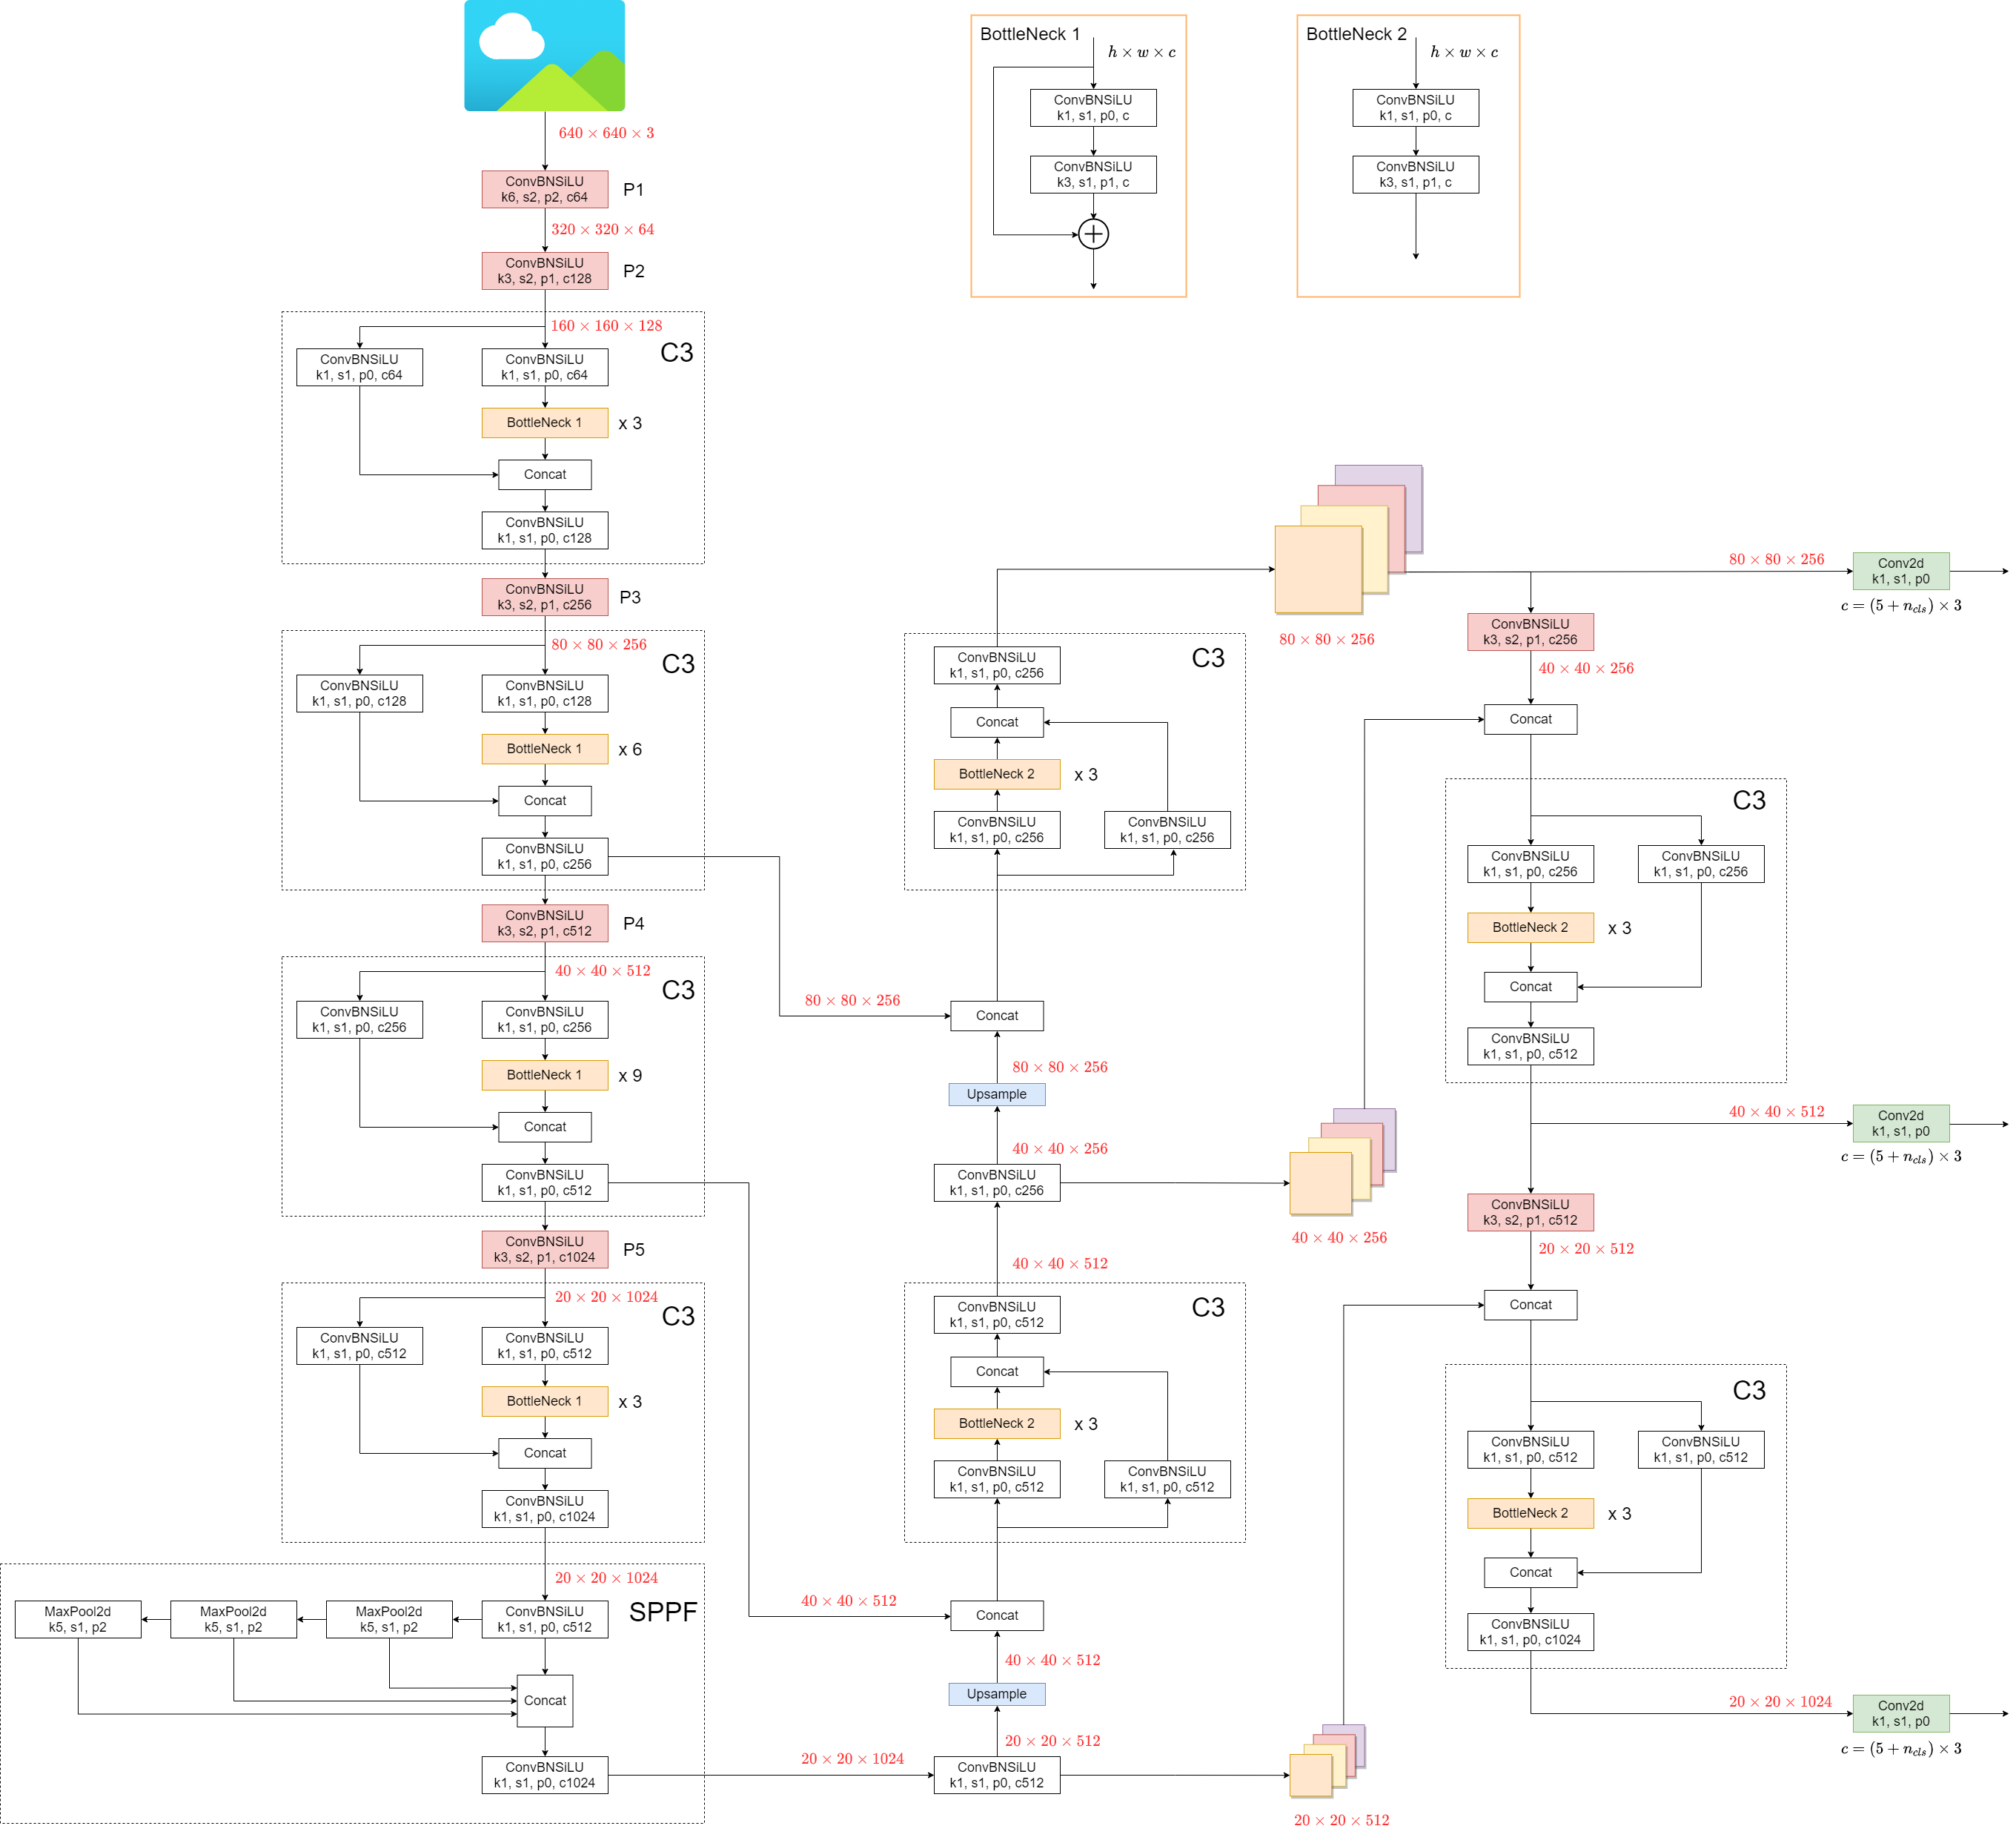

## Load the Pre-trained YOLO Model

First, we will load the pre-trained YOLO model. We will use the `torch.hub.load` function to load the pre-trained YOLOv5n model. The `torch.hub.load` function loads the model from the PyTorch Hub. The PyTorch Hub is a repository of pre-trained models and datasets. It provides a convenient way to load the pre-trained models and datasets for various tasks. We will use the `torch.hub.load` function to load the pre-trained YOLOv5n model from the PyTorch Hub.

The YOLOv5n model is pretrained on the COCO dataset, enabling it to detect 80 common categories. You can find the availabel model list and performance [here](https://github.com/ultralytics/yolov5?tab=readme-ov-file#pretrained-checkpoints).

In [ ]:
import torch

# Load the pre-trained YOLOv5n model
model = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True, verbose=False)
print(model)

The `torch.hub.load` function takes four arguments:

* The first argument is the name of the repository. In this case, it is `ultralytics/yolov5`.
* The second argument is the name of the model. In this case, it is `yolov5n`.
* The third argument is the flag to load the pre-trained model. In this case, it is `pretrained=True`.
* The fourth argument is the flag to suppress the output. In this case, it is `verbose=False`.

After loading the model, we will print the summary of the pre-trained YOLO model. We will use the print function to `print` the summary of the pre-trained YOLO model. The `print` function takes the model summary as an argument.

##Detect Objects in Images

Next, we will detect objects in the images using the pre-trained YOLO model. We will use the `detect` method of the pre-trained YOLO model to detect objects in the images. The `detect` method takes the input images as an argument and returns the detected objects in the images. We will use the `detect` method to detect objects in a few images and visualize the results.



In [ ]:
# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(imgs)
results.print()

results.pandas().xyxy[0]

The output result consists of the following elements:

* coordinates: indicating the top-left corner (x_min, y_min) and the bottom-right corner (x_max, y_max) of the bounding box.
* confidence: the confidence score of the identified class.
* class: class label for the detected object.
* name: category name to which the label corresponds.

##Visualize the Results

Finally, we will visualize the results of the object detection. We will use the show method of the pre-trained YOLO model to visualize the results of the object detection. The show method takes the input images and the detected objects as arguments and visualizes the results of the object detection. We will use the show method to visualize the results of the object detection in the images.


In [ ]:
results.show()

## Detect Objects in Videos


Next, we will detect objects in the videos using the pre-trained YOLO model. We will make use of `supervision` package to process the video and detect objects in the video. The `supervision` package provides a convenient way to process the video and detect objects in the video. We will use the `supervision` package to process the video and detect objects in the video.



In [ ]:
!pip install supervision

In [ ]:
import supervision as sv
import numpy as np
import torch

video_path = 'car_chase_01.mp4'
torch.hub.download_url_to_file('https://github.com/dannylee1020/object-detection-video/raw/master/videos/car_chase_01.mp4', video_path, progress=False)

video_info = sv.VideoInfo.from_video_path(video_path)

In [ ]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame)
    results.save()
    results.show()
    return frame

sv.process_video(source_path=video_path, target_path=f"result.mp4", callback=process_frame)

# Case Study: Training the YOLO Model from Scratch with VOC Dataset


In this section, we will go through the process of training the YOLO model on a dataset from scratch. We will use the YOLOv5 model to train the model on a dataset of images and labels. We will use the pre-trained YOLOv5 model as the starting point and fine-tune the model on the dataset. We will use the COCO dataset as the starting point and fine-tune the model on the dataset. We will use the pre-trained YOLOv5 model to detect objects in the images and videos and visualize the results.

Pascal Visual Object Classes (VOC) [link text](http://host.robots.ox.ac.uk/pascal/VOC/) dataset is a standard dataset for object detection. It contains 20 classes of objects, including person, car, bus, and bicycle. We will use the VOC dataset to train the YOLO model. We will use the YOLOv5 model artitecture with yolov5n's hyperparameters and training from scratch on the VOC dataset.

## Install the Required Libraries

First, we will install the required libraries for training the YOLO model. We will use the `pip` package manager to install the required libraries. We will install the `yolov5` package, which contains the YOLOv5 model and the required utilities for training the model. We will also install the `pycocotools` package, which contains the COCO dataset and the required utilities for training the model.



In [ ]:
!pip install yolov5 pycocotools pillow==9.5.0

## Download the VOC Dataset

Next, we will start with download the VOC dataset. We define the `data_dict` dictionary with the path to the VOC dataset and the names of the classes. This format follow the request of YOLOv5 and you can find the example [here](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml).



In [ ]:
import os
import yaml
data_dict = {'path': os.path.abspath('./datasets/VOC'),
             'train': ['images/train2012', 'images/train2007', 'images/val2012', 'images/val2007'],
             'val': ['images/test2007'], 'test': ['images/test2007'],
             'names': {0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat',
                       8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person',
                       15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}}

with open('VOC.yaml', 'w') as file:
    yaml.dump(data_dict, file, default_flow_style=False)

In [ ]:
import torch
import tarfile
from pathlib import Path

# Download
dir = Path(data_dict['path'])  # dataset root dir
dir.mkdir(parents=True, exist_ok=True)  # create dir
(dir / 'images').mkdir(parents=True, exist_ok=True)  # create dir

urls = ['http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar',  # 446MB, 5012 images
        'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar',  # 438MB, 4953 images
        'http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar']  # 1.95GB, 17126 images
# download(urls, dir=dir / 'images', delete=False, curl=True, threads=3)
for url in urls:
    torch.hub.download_url_to_file(url, dir / 'images' / url.split('/')[-1], progress=False)

# Extract
for file in dir.glob('images/*.tar'):
    dir.mkdir(exist_ok=True, parents=True)  # create dir
    print(f'Extracting {file}...')
    tar = tarfile.open(file)
    tar.extractall(dir / 'images')
    tar.close()
    file.unlink()  # delete tar after extraction

## Convert the VOC Dataset to YOLO Format

Next, we will convert the VOC dataset to the YOLO format.



To enable your data for YOLO training, you should export your labels to YOLO format, with one `*.txt` file per image (if no objects in image, no `*.txt` file is required). The `*.txt` file specifications are:

* One row per object
* Each row is class `x_center y_center width height` format.
* Box coordinates must be in normalized xywh format (from 0 to 1). If your boxes are in pixels, divide `x_center` and `width` by image width, and `y_center` and `height` by image height.
* Class numbers are zero-indexed (start from 0).

In [ ]:
import xml.etree.ElementTree as ET
from tqdm import tqdm

def convert_label(path, lb_path, year, image_id):
    def convert_box(size, box):
        dw, dh = 1. / size[0], 1. / size[1]
        x, y, w, h = (box[0] + box[1]) / 2.0 - 1, (box[2] + box[3]) / 2.0 - 1, box[1] - box[0], box[3] - box[2]
        return x * dw, y * dh, w * dw, h * dh

    in_file = open(path / f'VOC{year}/Annotations/{image_id}.xml')
    out_file = open(lb_path, 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    names = list(data_dict['names'].values())
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls in names and int(obj.find('difficult').text) != 1:
            xmlbox = obj.find('bndbox')
            bb = convert_box((w, h), [float(xmlbox.find(x).text) for x in ('xmin', 'xmax', 'ymin', 'ymax')])
            cls_id = names.index(cls)  # class id
            out_file.write(" ".join([str(a) for a in (cls_id, *bb)]) + '\n')

# Convert
path = dir / 'images/VOCdevkit'
for year, image_set in ('2012', 'train'), ('2012', 'val'), ('2007', 'train'), ('2007', 'val'), ('2007', 'test'):
    imgs_path = dir / 'images' / f'{image_set}{year}'
    lbs_path = dir / 'labels' / f'{image_set}{year}'
    imgs_path.mkdir(exist_ok=True, parents=True)
    lbs_path.mkdir(exist_ok=True, parents=True)

    with open(path / f'VOC{year}/ImageSets/Main/{image_set}.txt') as f:
        image_ids = f.read().strip().split()
    for id in tqdm(image_ids, desc=f'{image_set}{year}'):
        f = path / f'VOC{year}/JPEGImages/{id}.jpg'  # old img path
        lb_path = (lbs_path / f.name).with_suffix('.txt')  # new label path
        f.rename(imgs_path / f.name)  # move image
        convert_label(path, lb_path, year, id)  # convert labels to YOLO format

## Define hyperparameters and training settings

Next, we will define the hyperparameters and training settings for training the YOLO model. We will use the hyperparameters and training settings from the YOLOv5 model. We will define the hyperparameters and training settings as a dictionary and pass it to the train method of the YOLO model. You can find more settings for other datasets from [here](https://github.com/ultralytics/yolov5/tree/master/data/hyps).



In [ ]:
hyp = {
    'lr0': 0.00334,
    'lrf': 0.15135,
    'momentum': 0.74832,
    'weight_decay': 0.00025,
    'warmup_epochs': 3.3835,
    'warmup_momentum': 0.59462,
    'warmup_bias_lr': 0.18657,
    'box': 0.02,
    'cls': 0.21638,
    'cls_pw': 0.5,
    'obj': 0.51728,
    'obj_pw': 0.67198,
    'iou_t': 0.2,
    'anchor_t': 3.3744,
    'fl_gamma': 0.0,
    'hsv_h': 0.01041,
    'hsv_s': 0.54703,
    'hsv_v': 0.27739,
    'degrees': 0.0,
    'translate': 0.04591,
    'scale': 0.75544,
    'shear': 0.0,
    'perspective': 0.0,
    'flipud': 0.0,
    'fliplr': 0.5,
    'mosaic': 0.85834,
    'mixup': 0.04266,
    'copy_paste': 0.0,
    'anchors': 3.412
}

with open('hyp.VOC.yaml', 'w') as file:
    yaml.dump(data_dict, file, default_flow_style=False)

## Train the YOLO Model

Finally, we will train the YOLO model on the VOC dataset. We will use the `train` method of the YOLO model to train the model on the VOC dataset. You can find the complete parameter options from [here](https://github.com/ultralytics/yolov5/blob/master/train.py).


In [ ]:
from yolov5 import train
# Train the YOLOv5 model
train.run(
    imgsz=640,
    data='VOC.yaml',
    hyp='hyp.VOC.yaml'
    weights='yolov5n.pt',
    epochs=3,
    batch_size=4,
    device='0',
    project='train',
    name='exp',
    workers=2
)

## Visulization

In [ ]:
from IPython.display import display, Image
image_path = '/content/train/exp/val_batch0_pred.jpg'
display(Image(filename=image_path))

## Test

You can test the model with your own data.

Here are some optional input formats for source.

```
--source 0                 # webcam
     img.jpg              # image
     vid.mp4              # video
     screen              # screenshot
     path/               # directory
     list.txt             # list of images
     list.streams           # list of streams
     'path/*.jpg'           # glob
     'https://youtu.be/LNwODJXcvt4'  # YouTube
     'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

```



In [ ]:
from yolov5 import detect
from IPython.display import display, Image

detect.run(
    weights="/content/train/exp/weights/best.pt",
    source="https://watermark.lovepik.com/photo/20211126/large/lovepik-hongkong-street-view-picture_501147683.jpg",
    name='test',
    exist_ok=1
)

folder_path = 'runs/detect/test'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]
image_path = os.path.join(folder_path, image_files[0])
display(Image(filename=image_path))

# Exercise: Detect Objects in Images Captured from the Car's Camera

In this exercise, please use the [Udacity Self Driving Car Dataset](https://public.roboflow.com/object-detection/self-driving-car) to train the YOLO model and detect objects in the images captured from the car's camera. You will need to train from scratch and visualize the results.

## Udacity Self Driving Car Dataset

The Udacity Self Driving Car Dataset is a standard dataset for self-driving cars. It contains images and labels of objects in the environment, including other vehicles, pedestrians, traffic signs, and other objects. We will use the Udacity Self Driving Car Dataset to train the YOLO model and detect objects in the images captured from the car’s camera. There are only 11 classes in the dataset, including car, truck, pedestrian, traffic light, and other objects.

##Instructions
* Download the dataset and split it into train set and validation set (20%). Create a corresponding yaml dataset file.
* Define the proper hyperparameters and training settings.
* Train the model with the dataset.
* Test the trained model on the validation set.